# Evaluation corpus statistics

This notebook gathers all of the items in the evaluation set to provide some statistics about what it contains.

Ground truth authors and affiliations were cataloged by hand using SHROOM, and are downloaded as Cocina from SDR by the `preprints:download` task (see README.md). This needs to be run prior to running this notebook.

Article plain texts are extracted from the PDFs using the `preprints:clean` task (see README.md). This also needs to be run prior to running this notebook.

In [1]:
# set up project root path for imports
import sys
import os
import pathlib
root = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
PROJECT_ROOT = pathlib.Path(root)

# make scripts in scripts/ importable and import util functions
sys.path.insert(1, str(PROJECT_ROOT / 'scripts'))
from notebook_utils import get_preprint_text, get_gold_affiliations

# set up data table with columns for gold and predicted affiliations
import pandas as pd
preprints = pd.read_csv(PROJECT_ROOT / 'assets' / 'preprints.csv')
preprints['gold'] = ''

# add the full text and gold affiliations to the data table
for i, row in preprints.iterrows():
    preprint_id = row['OpenAlex ID']
    preprint_text = get_preprint_text(preprint_id)
    preprint_file = PROJECT_ROOT / "assets" / "preprints" / "pdf" / f"{preprint_id}.pdf"
    preprints.at[i, 'gold'] = get_gold_affiliations(preprint_id)
    preprints.at[i, 'text'] = preprint_text

Preprint text not found for W3091005730
Preprint text not found for W3185060415


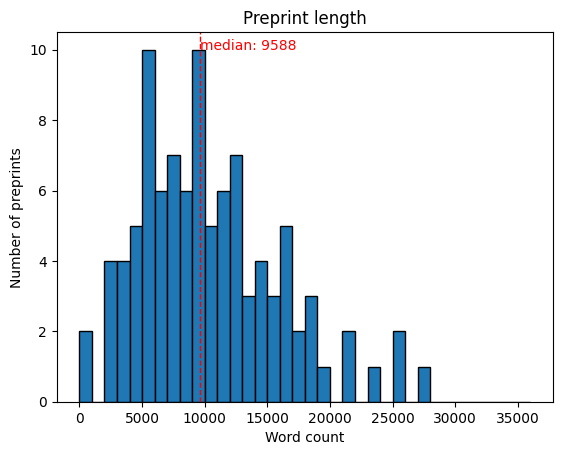

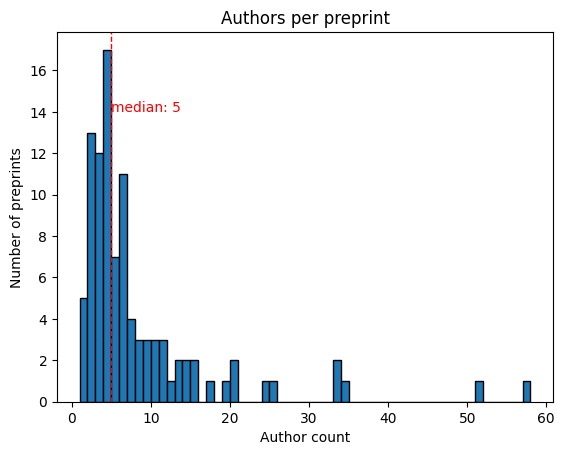

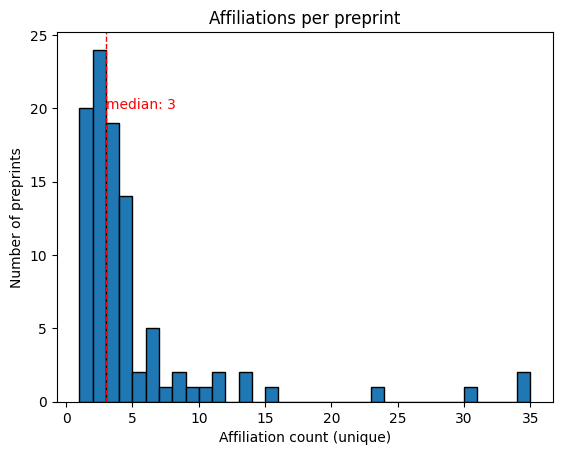

In [27]:
%matplotlib inline
import matplotlib.pyplot as plt

# plot the distribution of the number of words per preprint
word_counts = preprints['text'].apply(lambda x: len(x.split()))
max_words = max(word_counts)
median_words = word_counts.median()
plt.hist(word_counts, bins=range(0, max_words, 1000), edgecolor='black')
plt.xlabel('Word count')
plt.ylabel('Number of preprints')
plt.title('Preprint length')
plt.axvline(median_words, color='r', linestyle='dashed', linewidth=1)
plt.text(median_words, 10, f'median: {median_words:.0f}', color='r')
plt.show()

# plot the distribution of the number of authors per preprint
author_counts = preprints['gold'].apply(lambda x: len(x))
max_authors = max(author_counts)
median_authors = author_counts.median()
plt.hist(author_counts, bins=range(1, max_authors), edgecolor='black')
plt.xlabel('Author count')
plt.ylabel('Number of preprints')
plt.title('Authors per preprint')
plt.axvline(median_authors, color='r', linestyle='dashed', linewidth=1)
plt.text(median_authors, 14, f'median: {median_authors:.0f}', color='r')
plt.show()

# plot the distribution of the number of affiliations per preprint
def count_unique_affiliations(affiliations):
    unique_affiliations = set()
    for _author, author_affiliations in affiliations.items():
        for affiliation in author_affiliations:
            unique_affiliations.add(affiliation)
    return len(unique_affiliations)
affiliation_counts = preprints['gold'].apply(count_unique_affiliations)
max_affiliations = max(affiliation_counts)
median_affiliations = affiliation_counts.median()
plt.hist(affiliation_counts, bins=range(1, max_affiliations), edgecolor='black')
plt.xlabel('Affiliation count (unique)')
plt.ylabel('Number of preprints')
plt.title('Affiliations per preprint')
plt.axvline(median_affiliations, color='r', linestyle='dashed', linewidth=1)
plt.text(median_affiliations, 20, f'median: {median_affiliations:.0f}', color='r')
plt.show()
